# World Bank Data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [2]:
filename = '../datasets/World Bank DataBank World Development Indicators/indicators_selected.csv'

In [3]:
df = pd.read_csv(filename)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10750 entries, 0 to 10749
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country Name                              10750 non-null  object 
 1   Year                                      10750 non-null  int64  
 2   Population, total                         10519 non-null  float64
 3   Fertility rate, total (births per woman)  10143 non-null  float64
 4   Life expectancy at birth, total (years)   10135 non-null  float64
 5   Continent                                 10750 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 504.0+ KB


In [56]:
df['Continent'].value_counts()

Continent
Africa           2700
Asia             2500
Europe           2300
North America    1700
Oceania           950
South America     600
Name: count, dtype: int64

In [57]:
color_mapping = {
    'Africa': 'green',
    'Asia': 'red',
    'Europe': 'yellow',
    'North America': 'blue',
    'Oceania': 'purple',
    'South America': 'oranje',
}

In [9]:
year = 2020

In [11]:
df_selected = df.query(f'Year == {year}')

In [93]:
def scatter_plot(df):
    year = df['Year'].max()
    
    fig, ax = plt.subplots()
    
    x_column = 'Fertility rate, total (births per woman)'
    y_column = 'Life expectancy at birth, total (years)'
    sizes_column = 'Population, total'
    sizes_max = df[sizes_column].max()
    sizes_min = df[sizes_column].min()
    
    for continent, color in color_mapping.items():
        df_continent = df[df['Continent']==continent]
        sizes = (df_continent[sizes_column] - sizes_min) / (sizes_max - sizes_min) * 3000 + 100
        ax.scatter(df_continent[x_column], df_continent[y_column], alpha=0.4, s=sizes)

    ax.set_xlim(0, 10)
    ax.set_ylim(0, 100)
    ax.set_title(year)
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.grid()
    
    plt.show()

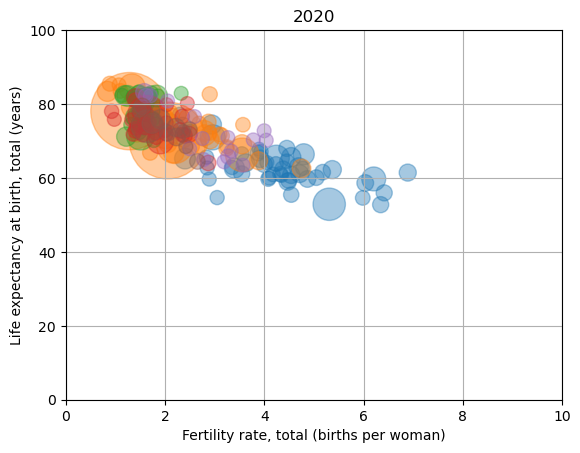

In [94]:
scatter_plot(df_selected)

In [95]:
def f(year):
    scatter_plot(df.query(f'Year == {year}'))

In [96]:
widgets.interact(f, year=widgets.IntSlider(min=1975, max=2020, step=1, value=2020));

interactive(children=(IntSlider(value=2020, description='year', max=2020, min=1975), Output()), _dom_classes=(…